In [ ]:
!pip install fastdup

## Connect to google drive

In [ ]:
# Read readme.md from github
from google.colab import drive
drive.mount('/gdrive')
%cd "/gdrive/My Drive/Challenge_1 (1)/"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Challenge_1 (1)


## Python imports

In [ ]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)
import cv2


import logging

import random
random.seed(seed)# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.12.0


## Prepare images from dataset

### Import data
* Imprting original dataset

In [ ]:
data = np.load('original_dataset.npz', allow_pickle=True)

In [ ]:
images = data["data"]
print(len(data["data"]))

4532


### Convert images to jpg

In [ ]:
import os
from PIL import Image
import numpy as np
from tqdm.auto import tqdm

# Create a mapping from integer labels to string names
label_names = np.array(["healthy", "unhealthy"])  # Note: Corrected the array definition

# Create folder to store the images in Colab's local disk
root_dir = '/content/images3'  # Use the '/content' directory in Colab
os.makedirs(root_dir, exist_ok=True)

# Get the total number of samples in the dataset
n_samples = len(data["data"])

# Iterate through the dataset to save images
for i, (image, label) in enumerate(zip(images, data["labels"])):
    # Convert integer label to string name
    label_name = label

    # Create class directory if it doesn't exist
    class_dir = os.path.join(root_dir, label_name)
    os.makedirs(class_dir, exist_ok=True)

    # Define image path and save image
    image_path = os.path.join(class_dir, f'image_{i}.jpg')
    img = np.squeeze(image)  # Remove any singleton dimensions
    img = Image.fromarray(image.astype('uint8'))
    img.save(image_path)


### Load images to dataframe

In [ ]:
import pandas as pd

# Get a list of file paths for all JPEG files in the directory and its subdirectories
file_paths = []
labels = []
for root, dirs, files in os.walk('/content/images3'):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg')):
            file_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Create a pandas dataframe from the list of file paths and labels
df = pd.DataFrame({'filename': file_paths, 'label': labels, 'split': 'train'})

# Print the resulting dataframe
df

,filename,label,split
0,/content/images3/healthy/image_374.jpg,healthy,train
1,/content/images3/healthy/image_1855.jpg,healthy,train
2,/content/images3/healthy/image_1192.jpg,healthy,train
3,/content/images3/healthy/image_1937.jpg,healthy,train
4,/content/images3/healthy/image_832.jpg,healthy,train
...,...,...,...
4527,/content/images3/unhealthy/image_3315.jpg,unhealthy,train
4528,/content/images3/unhealthy/image_4141.jpg,unhealthy,train
4529,/content/images3/unhealthy/image_2925.jpg,unhealthy,train
4530,/content/images3/unhealthy/image_3036.jpg,unhealthy,train


## FastDup

### Install FastDup

In [ ]:
!pip install fastdup

### Define I/O

In [ ]:
import fastdup
fd = fastdup.create(input_dir='/content/images3', work_dir='/content/cc')
fd.run(annotations=df)

### Image groupings

healthy


Generating gallery:   0%|          | 0/1 [00:00<?, ?it/s]

Finished OK. Components are stored as image files /content/cc/galleries/components_[index].jpg
Stored components visual view in  /content/cc/galleries/components.html
Execution time in seconds 1.0
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



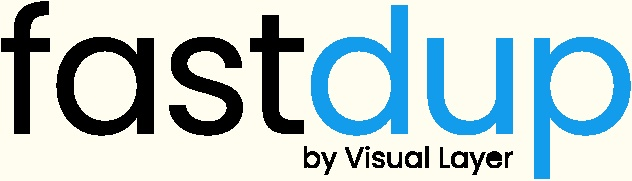
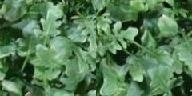

0

In [ ]:
fd.vis.component_gallery()

### Duplicates

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similarity visual view in  /content/cc/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



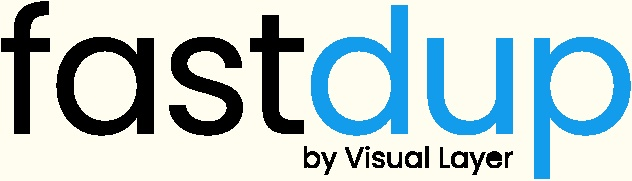
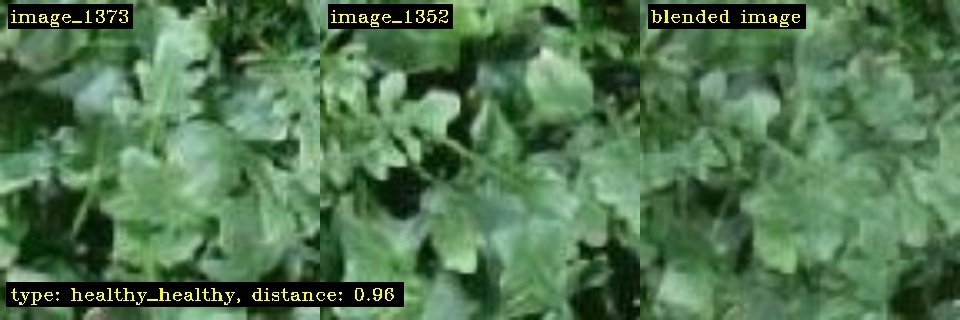
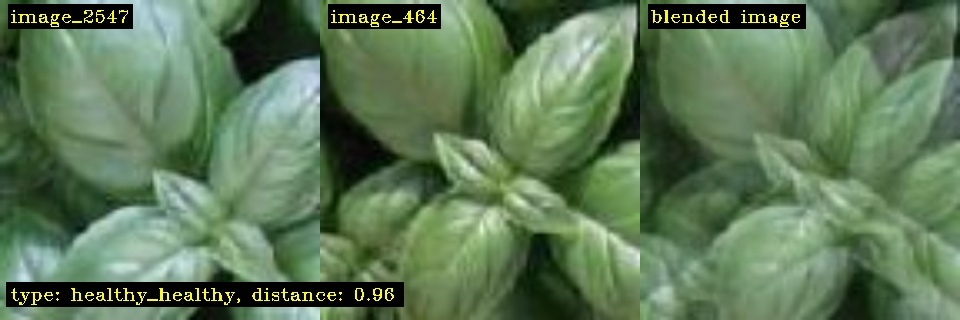
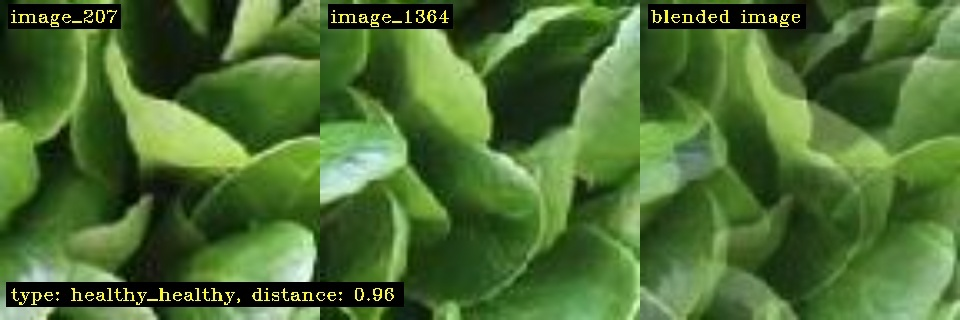
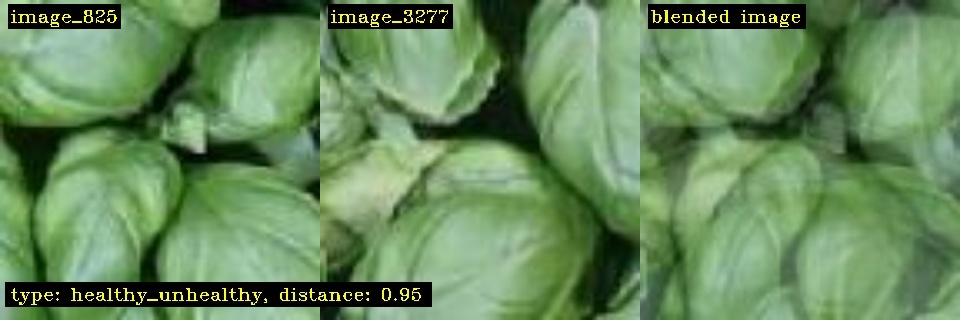
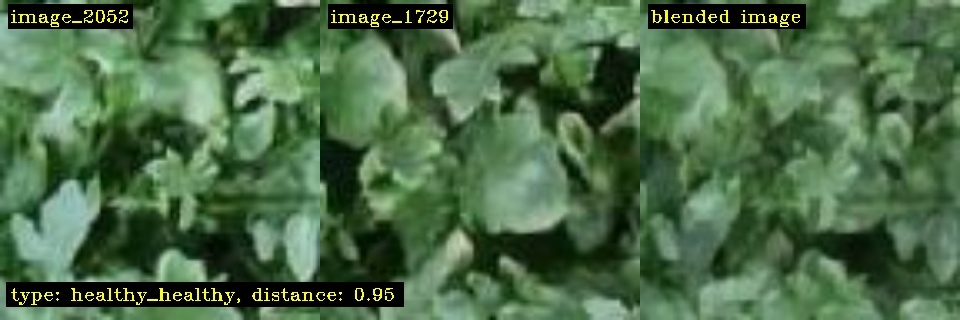
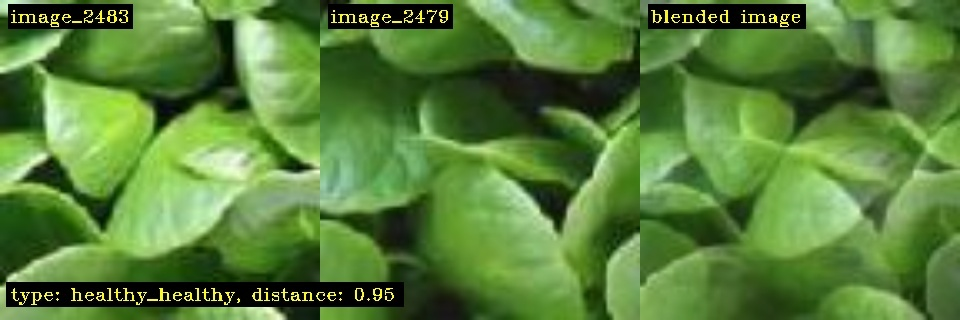
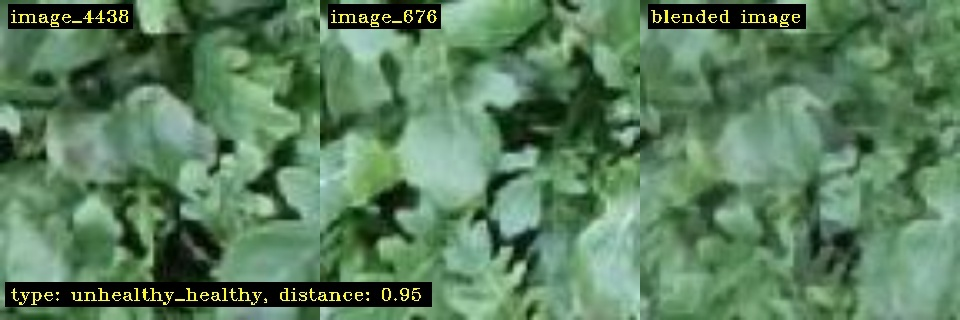
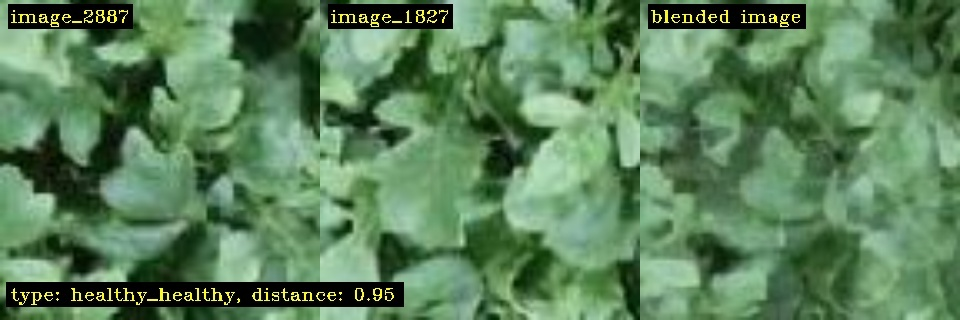
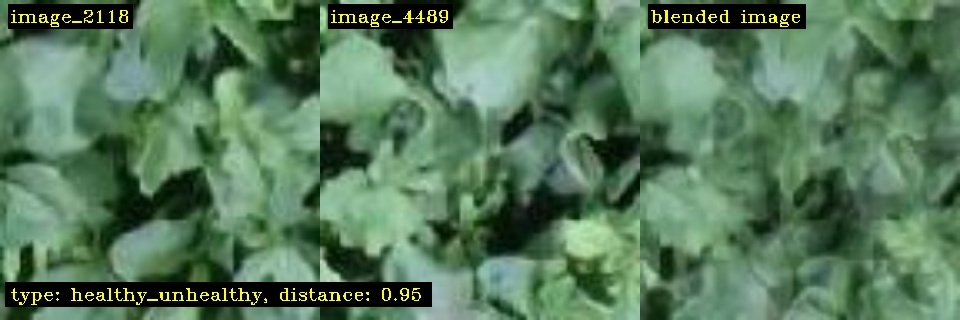
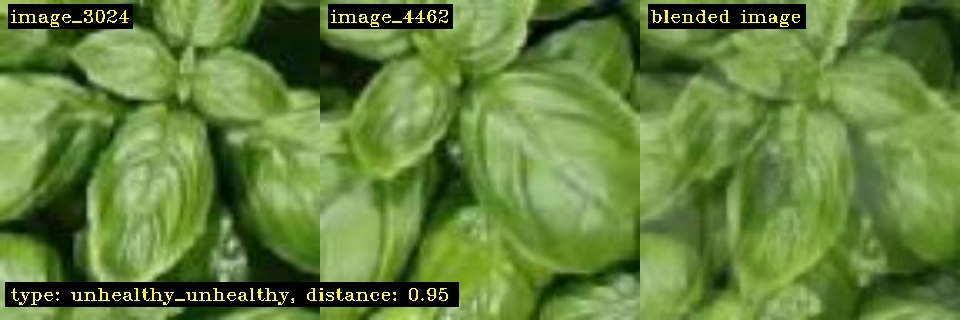

0

In [ ]:
fd.vis.duplicates_gallery()

### Outliers

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored outliers visual view in  /content/cc/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



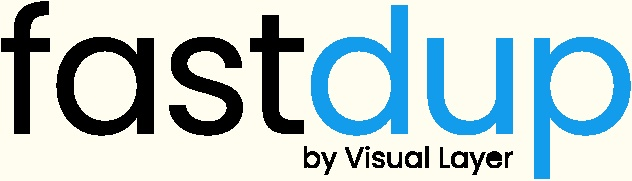
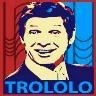
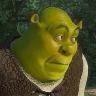
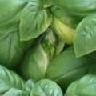
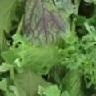
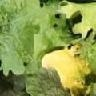
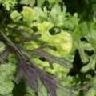
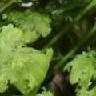
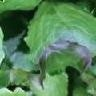
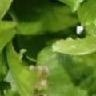
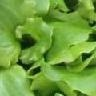
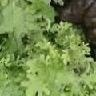
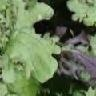
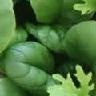
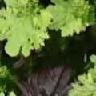
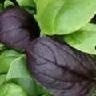
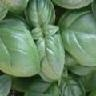
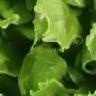
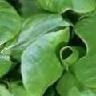
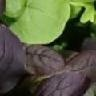
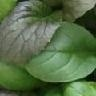

0

In [ ]:
fd.vis.outliers_gallery()


### Too dark

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored mean visual view in  /content/cc/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



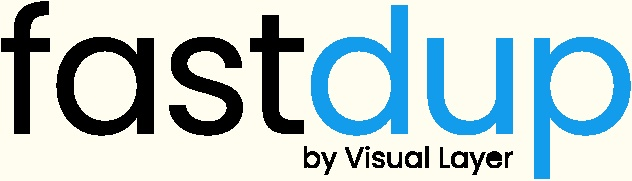
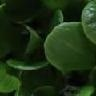
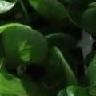
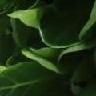
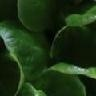
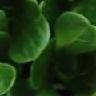
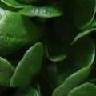
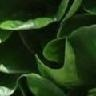
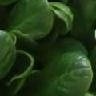
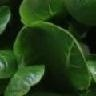
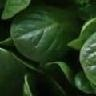
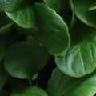
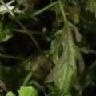
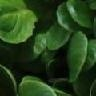
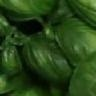
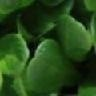
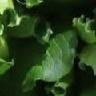
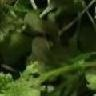
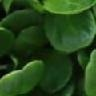
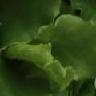
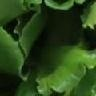

0

In [ ]:
fd.vis.stats_gallery(metric='dark')